### Treść zadania

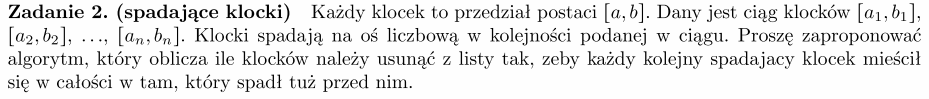

# I Sposób

### Omówienie algorytmu

Zdefiniujmy funkcję: <br>
$ f(i) $ - najwyższa "wieża", jaką możemy zbudować, kończąca się na klocku o indeksie $ i $.
<br><br>
W algorytmie dla każdego kolejnego klocka iterujemy przez wszystkie poprzednie i sprawdzamy, czy dany klocek może upaść w całości na któryś z poprzednich. Jeżeli może, to wówczas badamy, czy jeżeli stanie się on górnym klockiem z tej wieży (tzn. jeżelu umieścimy go na badanym klocku), to wzrośnie wysokość tej wieży (to znaczy, czy na tym klocku już wcześniej nie było innych klocków, jeżeli nie, to wieża będzie wyższa). Odpowiednio zapisujemy wysokość najwyższej wieży, jaką da się w ten sposób utworzyć, kończącej się na klocku o indeksie $ i $. Na koniec wystarczy odjąć od liczby wszystkich klocków wysokość najwyższej wieży, a otrzymana liczba będzie równa liczbie klocków do usunięcia, bo chcemy usunąć minimalną liczbę klocków, a to sprowadza się do tego, że chcemy zbudować możliwie najwyższą wieżę.

### Złożoność

###### Obliczeniowa:
$ O(n^2) $
###### Pamięciowa:
$ O(n) $

### Implementacja

In [1]:
def count_removed_bricks(A: 'array of bricks spans'):
    n = len(A)
    F = [1] * n
    
    for i in range(1, n):
        for j in range(i):
            # Check if a brick A[i] can fall on a brick A[j]
            if can_fall(A[i], A[j]):
                F[i] = max(F[i], F[j] + 1)
                
    print(F)
                
    return n - max(F)


def can_fall(a, b):
    return a[0] >= b[0] and a[1] <= b[1]

###### Kilka testów

In [2]:
ranges = [
    [0, 5],
    [1, 4],
    [-3, 7],
    [2, 3],
    [2, 6],
    [4, 6],
    [2, 3]
]

print(count_removed_bricks(ranges))

[1, 2, 1, 3, 2, 3, 4]
3


# II Sposób

### Omówienie

Zauważmy, że problem można również rozwiązać, przy pomocy algorytmu, wyznaczającego najdłuższy podciąg rosnący. W naszym przypadku nie szukamy jednak rosnącego ciągu liczbowego, lecz ciągu zawierających się w sobie przedziałów (kolejne przedziały muszą w całości być zawarte w poprzednich). Problem się zatem sprowadza do zmodyfikowania funkcji $ LIS $ (patrz 1. wykład z programowania dynamicznego) w taki sposób, aby najpierw otrzymać najdłuższy podciąg przedziałow, z których każdy kolejny ma pierwszą współrzędną nie mniejszą niż poprzedni (nie wystaje z lewej strony poprzednich klocków), a następnie według współrzędnej końca, tak, aby koniec każdego kolejnego przedziału, znajdował się nie dalej niż koniec poprzednich przedziałów (aby nowy przedział nie wystawał z prawej strony poprzednich).
<br><br>
Najlepszym pod względem czytelności i łatwości modyfikacji sposobem jest dodanie funkcji callback, która odpowiada za porównanie odpowiednich w danym momencie wartości dwóch przedziałów, a więc najpierw wartości ich pierwszej współrzędnej, a następnie drugiej. Wywołujemy 2 razy funkcję $ longestseq $ (zmodyfikowana funkcja $ LIS $ - modyfikacja polega wyłącznie na dodaniu parametru $ fn $ - funkcji callback oraz przekazaniu jej do binary searcha, w którym podmieniony jest sztywno ustalony warunek porównania na tę funkcję, porównującą 2 przedziały), najpierw tak, aby uzyskać nie malejący ciąg początków przedziałów, a następnie, na wynikowym podciągu, wywołujemy funkcję drugi raz, by uzyskać nie rosnący ciąg końców.
<br><br>
###### UWAGA:
Funkcja $ longestseq $ zwraca tablicę przedziałów, które NIE SĄ przedziałami, jakie utworzą finalny podciąg, a jedynie tymczasowymi końcami podciągów.

### Złożoność

###### Obliczeniowa:
$ O(n \cdot log(n)) $
###### Pamięciowa:
$ O(n) $

### Implementacja

In [3]:
def binary_search(arr, val, fn):
    left_idx = 0
    right_idx = len(arr) - 1
    
    while left_idx <= right_idx:
        mid_idx = (left_idx + right_idx) // 2
        if fn(val, arr[mid_idx]):
            left_idx = mid_idx + 1
        else:
            right_idx = mid_idx - 1

    return left_idx  # It will never exceed the left side of an array


def longest_seq(arr, fn=lambda a, b: a > b):
    if len(arr) < 2: return len(arr)
    
    n = len(arr)
    top = []
    
    for i in range(n):
        j = binary_search(top, arr[i], fn)
        if j == len(top): top.append(arr[i])
        else: top[j] = arr[i]
    
    return top


def count_removed_bricks(A: 'array of bricks spans'):
    n = len(A)
    A = longest_seq(A, lambda curr, prev: curr[0] >= prev[0])
    print(A)
    A = longest_seq(A, lambda curr, prev: curr[1] <= prev[1])
    print(A)
    return n - len(A)

###### Kilka testów

In [4]:
ranges = [
    [0, 5],
    [1, 4],
    [-3, 7],
    [2, 3],
    [2, 6],
    [4, 6],
    [2, 3]
]

print(count_removed_bricks(ranges))

[[-3, 7], [1, 4], [2, 3], [2, 6], [2, 3]]
[[-3, 7], [2, 6], [2, 3], [2, 3]]
3


In [5]:
ranges = [(0, 10), (1, 10), (2, 6), (6, 7), (11, 20), (11, 19), (12, 18), (13, 19), (14, 20)]

print(count_removed_bricks(ranges))

[(0, 10), (1, 10), (2, 6), (6, 7), (11, 20), (11, 19), (12, 18), (13, 19), (14, 20)]
[(11, 20), (14, 20), (13, 19)]
6
